# 🏡 Exploratory Data Analysis: House Price Dataset


This notebook performs a detailed **Exploratory Data Analysis (EDA)** on a house price dataset with **4600 rows** and **18 columns**.
We will explore and explain each step, including:
- What is a target variable?
- What are outliers?
- What is a correlation matrix?
- How do we handle missing values?


In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the data
df = pd.read_csv("data.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## 📊 Step 1: Basic Information

In [3]:

# Dataset dimensions
print("Rows and columns:", df.shape)

# Data types
df.dtypes


Rows and columns: (4600, 18)


date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

## ⚠️ Step 2: Missing Values

In [4]:

# Check missing values
df.isnull().sum().sort_values(ascending=False).head(10)


date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
dtype: int64

## 📈 Step 3: Summary Statistics

In [5]:

# Basic statistics
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,4600,70,2014-06-23 00:00:00,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,4600.0,NaN,NaN,NaN,551962.988473,563834.702547,0.0,322875.0,460943.461539,654962.5,26590000.0
bedrooms,4600.0,NaN,NaN,NaN,3.40087,0.908848,0.0,3.0,3.0,4.0,9.0
bathrooms,4600.0,NaN,NaN,NaN,2.160815,0.783781,0.0,1.75,2.25,2.5,8.0
sqft_living,4600.0,NaN,NaN,NaN,2139.346957,963.206916,370.0,1460.0,1980.0,2620.0,13540.0
sqft_lot,4600.0,NaN,NaN,NaN,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,NaN,NaN,NaN,1.512065,0.538288,1.0,1.0,1.5,2.0,3.5
waterfront,4600.0,NaN,NaN,NaN,0.007174,0.084404,0.0,0.0,0.0,0.0,1.0
view,4600.0,NaN,NaN,NaN,0.240652,0.778405,0.0,0.0,0.0,0.0,4.0
condition,4600.0,NaN,NaN,NaN,3.451739,0.67723,1.0,3.0,3.0,4.0,5.0


## 🎯 Step 4: Target Variable - `price`


The target variable is what we want to predict. In this dataset, it's the `price` of the house.
We'll look at how it's distributed.


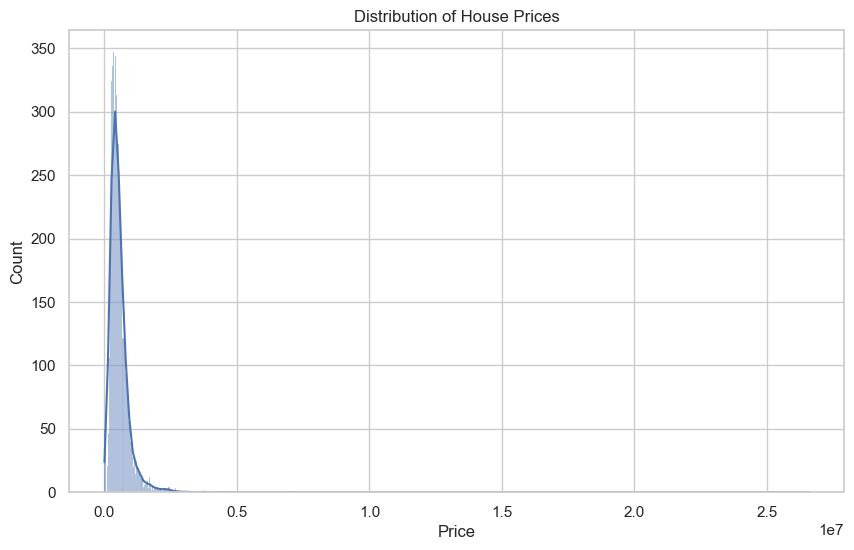

In [6]:

sns.histplot(df['price'], kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


## 🚨 Step 5: Detecting Outliers

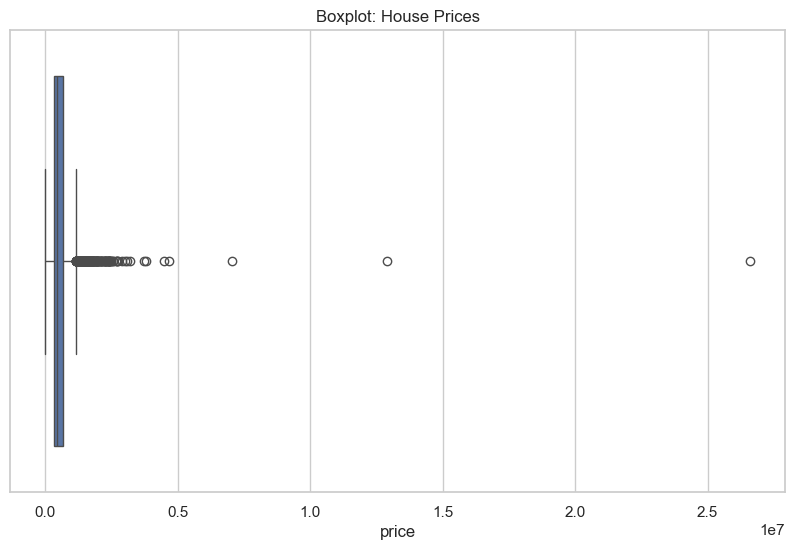

In [7]:

# Boxplot for price
sns.boxplot(x=df['price'])
plt.title("Boxplot: House Prices")
plt.show()


## 🔗 Step 6: Correlation Matrix


Correlation shows how two variables are related:
- +1 = strongly positive
- -1 = strongly negative
- 0 = no correlation


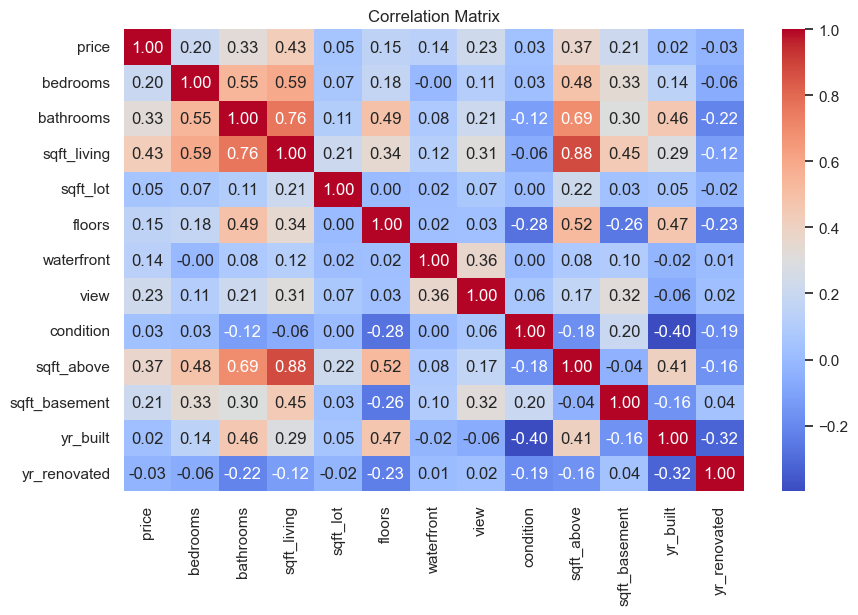

In [8]:

correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## 📉 Step 7: Bivariate Analysis (e.g. sqft vs price)

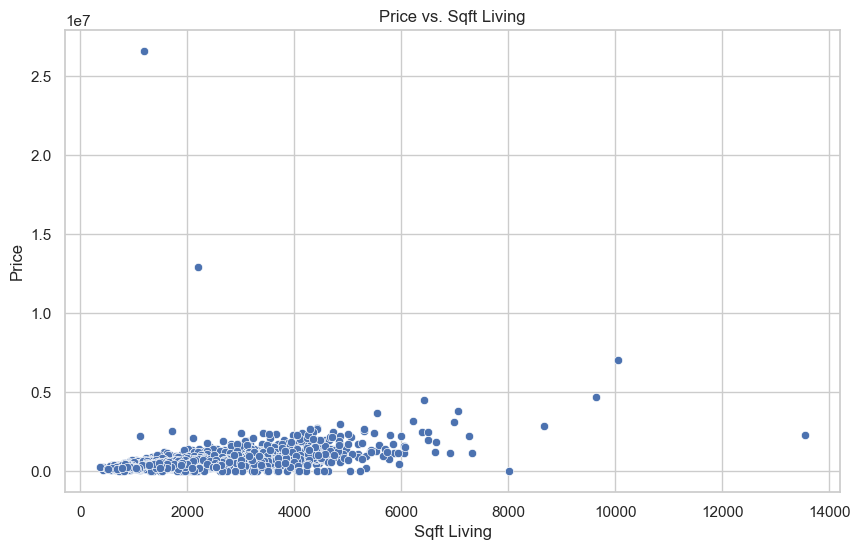

In [9]:

sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title("Price vs. Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()
